In [1]:
%matplotlib inline
import glob
import h5py
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import skopi as sk

import time
import numpy as np
from tqdm import tqdm

from IPython.display import clear_output
from sklearn.decomposition import PCA, IncrementalPCA

import sys
sys.path.append('../src/')
from embedding import batch_PCA, run_PCA

In [2]:
cryo_sim_dataset_dir='/sdf/scratch/fpoitevi/anass_internship/datasets/cryoem/sim/'

defocus = [0.5*i for i in range(1,7)]
copy_nb = list(range(2))

In [3]:
def plot_PCA(defoc1, defoc2) :
    
    batches1 = []
    batches2 = []
    
    pca1 = IncrementalPCA(n_components=10)
    pca2 = IncrementalPCA(n_components=10)
    
    n_images, nx, ny = 48, 648, 648
    m = len(copy_nb)
    
    for copy in copy_nb :
        cryo_sim_batch_1 = h5py.File(f'{cryo_sim_dataset_dir}4v6x_randomrot_copy{copy}_defocus{defoc1}_no_noise.h5', 'r')['data'][:]
        cryo_sim_batch_2 = h5py.File(f'{cryo_sim_dataset_dir}4v6x_randomrot_copy{copy}_defocus{defoc2}_no_noise.h5', 'r')['data'][:]
        
        batches1.append(cryo_sim_batch_1)
        batches2.append(cryo_sim_batch_2)
        
        pca1.partial_fit(cryo_sim_batch_1.reshape((n_images, nx*ny)))
        pca2.partial_fit(cryo_sim_batch_2.reshape((n_images, nx*ny)))
        
    batches1 = np.array(batches1).reshape(m*n_images, nx, ny)
    batches2 = np.array(batches2).reshape(m*n_images, nx, ny)
    
    components1 = pca1.transform(batches1.reshape(m*n_images, nx*ny))
    components2 = pca2.transform(batches2.reshape(m*n_images, nx*ny))
    
    eigenimages = [np.dot(components1.T, batches1.reshape(m*n_images, nx*ny)), np.dot(components2.T, batches2.reshape(m*n_images, nx*ny))]
    
    nrows=10
    ncols=2
    samples = np.random.choice(np.arange(m*n_images), 10)
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(9, 9*(nrows//ncols)))
    for i in range(nrows):
        for j in range(ncols):
            spl = samples[i]
            image = eigenimages[j][spl]
            axs[i,j].imshow(image, interpolation='none', cmap='Greys_r')
    plt.tight_layout()

IndexError: index 361 is out of bounds for axis 0 with size 10

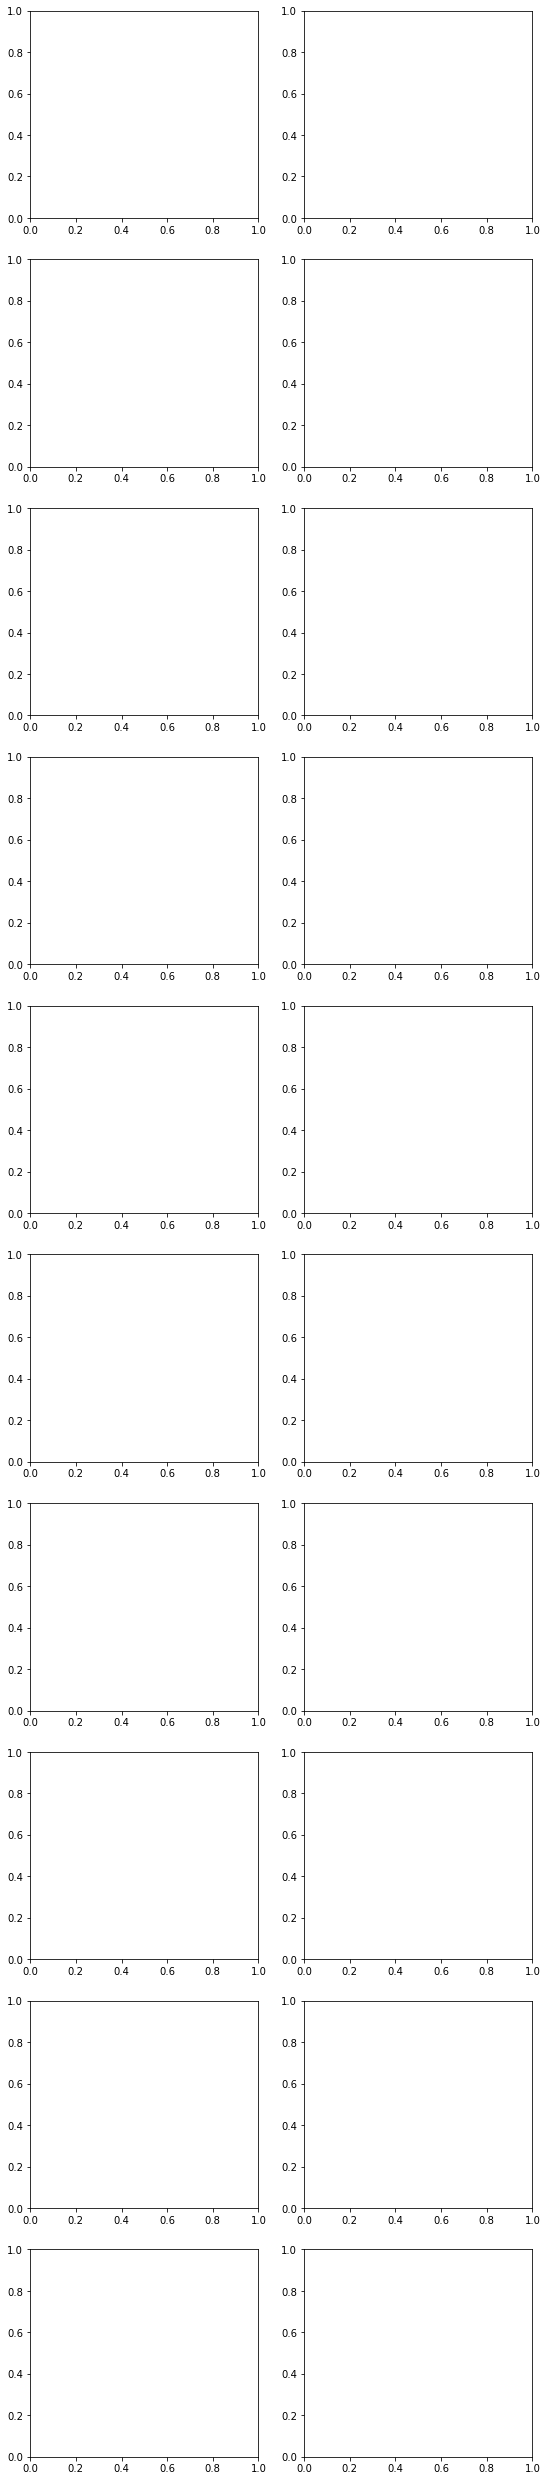

In [4]:
plot_PCA(0.5, 2.5)

In [24]:
cryo_sim_dataset_dir='/sdf/scratch/fpoitevi/anass_internship/datasets/cryoem/sim/'

cryo_sim_data1 = h5py.File(f'{cryo_sim_dataset_dir}4v6x_randomrot_copy0_defocus1.0_no_noise.h5', 'r')['data'][:]
cryo_sim_data2 = h5py.File(f'{cryo_sim_dataset_dir}4v6x_randomrot_copy1_defocus1.0_no_noise.h5', 'r')['data'][:]

In [25]:
pca = IncrementalPCA(n_components=10)

In [27]:
pca.partial_fit(cryo_sim_data1.reshape(48, 648*648))

IncrementalPCA(n_components=10)

In [28]:
pca.partial_fit(cryo_sim_data2.reshape(48, 648*648))

IncrementalPCA(n_components=10)

In [30]:
batches = np.array([cryo_sim_data1, cryo_sim_data2])

In [33]:
batches.reshape(2*48, 648*648).shape

(96, 419904)